## HYPE

### Example

In [1]:
from jmetal.algorithm.multiobjective.hype import HYPE
from jmetal.core.solution import FloatSolution
from jmetal.operator import SBXCrossover, PolynomialMutation
from jmetal.problem import ZDT1
from jmetal.util.termination_criterion import StoppingByEvaluations

problem = ZDT1()

reference_point = FloatSolution([0], [1], problem.number_of_objectives, )
reference_point.objectives = [1., 1.]  # Mandatory for HYPE

algorithm = HYPE(
    problem=problem,
    reference_point=reference_point,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables, distribution_index=20),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    termination_criterion=StoppingByEvaluations(2500)
)

algorithm.run()
solutions = algorithm.get_result()

We can now visualize the Pareto front approximation:

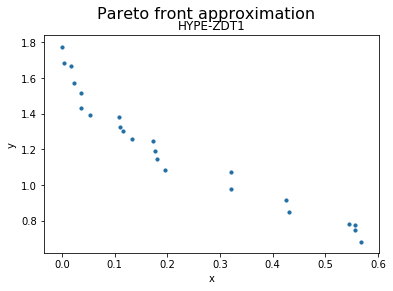

In [3]:
from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions

front = get_non_dominated_solutions(solutions)
    
plot_front = Plot(plot_title='Pareto front approximation', axis_labels=['x', 'y'])
plot_front.plot(front, label='HYPE-ZDT1')

### API